# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing Dataset

In [9]:
df1 = pd.read_csv("RUL Prediction Data/RUL_train_FD001.csv")
df1 = df1.drop(columns=["ID"])
df2 = pd.read_csv("RUL Prediction Data/RUL_train_FD002.csv")
df2 = df2.drop(columns=["ID"])
df3 = pd.read_csv("RUL Prediction Data/RUL_train_FD003.csv")
df3 = df3.drop(columns=["ID"])
df4 = pd.read_csv("RUL Prediction Data/RUL_train_FD004.csv")
df4 = df4.drop(columns=["ID"])

df1

,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9,SM10,SM11,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


## Model for FD001

In [34]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [26]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

KeyboardInterrupt: 

In [35]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

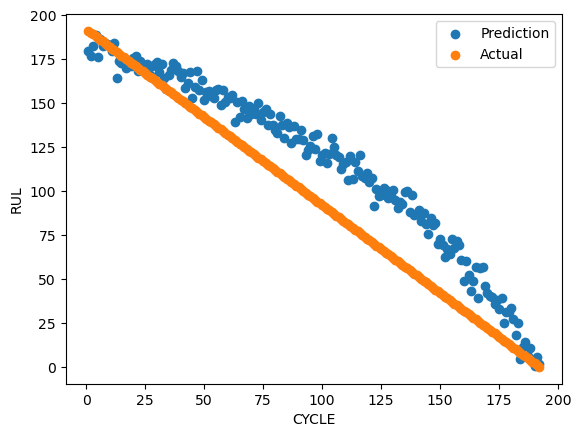

RMSE on Train set: 36.43568572389394


In [36]:
#Training Plot
y_pred = MLR.predict(X_train)

# Plot the train data
plt.scatter(X_train['Cycle'][0:192],y_pred[0:192])
plt.scatter(X_train['Cycle'][0:192],np.array(y_train)[0:192])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.show()


print('RMSE on Train set:', np.sqrt(metrics.mean_squared_error(y_train ,y_pred)))

RMSE on Test set: 54.72370548811519


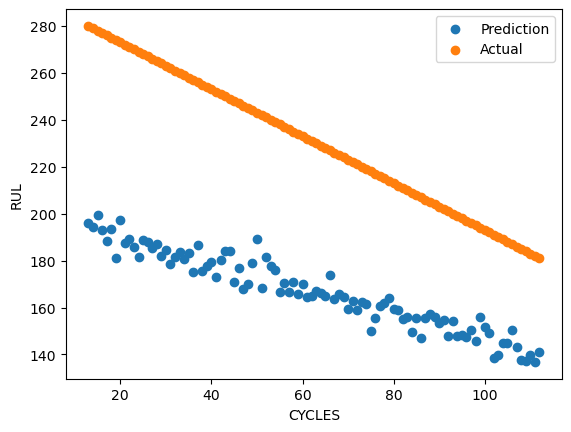

In [37]:
# Plot for Test Data
y_pred = MLR.predict(X_test)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plotting the test data
plt.scatter(X_test['Cycle'][100:200],y_pred[100:200])
plt.scatter(X_test['Cycle'][100:200],np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()